In [14]:
# ========================================
# 1️⃣ Import library
# ========================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [15]:
# ========================================
# 2️⃣ Load dataset
# ========================================
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/train",
    image_size=(256, 256),
    batch_size=64,
    label_mode="binary"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/val",
    image_size=(256, 256),
    batch_size=64,
    label_mode="binary"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/test",
    image_size=(256, 256),
    batch_size=64,
    label_mode="binary"
)


Found 1600 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 197 files belonging to 2 classes.


In [16]:
# ========================================
# 3️⃣ Normalisasi pixel (0–1) & prefetch biar lebih cepat
# ========================================
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (
    train_ds
    .map(lambda x, y: (x / 255.0, y))
    .shuffle(1000)
    .prefetch(AUTOTUNE)
)

val_ds = (
    val_ds
    .map(lambda x, y: (x / 255.0, y))
    .prefetch(AUTOTUNE)
)

test_ds = (
    test_ds
    .map(lambda x, y: (x / 255.0, y))
    .prefetch(AUTOTUNE)
)


In [17]:
# ========================================
# 4️⃣ Bangun model CNN sederhana
# ========================================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # output 1 neuron karena binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# ========================================
# 5️⃣ Latih model
# ========================================
early_stop = EarlyStopping(
    monitor='val_loss',   # pantau perubahan loss di data validasi
    patience=3,           # kalau gak ada peningkatan selama 3 epoch, stop
    restore_best_weights=True  # balikin bobot model ke hasil terbaik
)

# Latih model dengan early stopping
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[early_stop]
)


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.5856 - loss: 0.9619 - val_accuracy: 0.8650 - val_loss: 0.4150
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8000 - loss: 0.4491 - val_accuracy: 0.8750 - val_loss: 0.3000
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.8850 - loss: 0.2904 - val_accuracy: 0.9000 - val_loss: 0.2230
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9262 - loss: 0.1859 - val_accuracy: 0.9300 - val_loss: 0.1649
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9469 - loss: 0.1562 - val_accuracy: 0.9050 - val_loss: 0.2438
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9488 - loss: 0.1331 - val_accuracy: 0.9500 - val_loss: 0.1361
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9725 - loss: 0.0820 - val_accuracy: 0.9600 - val_loss: 0.1346
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9850 - loss: 0.0526 - val_accuracy: 0.9600 - val_loss:

In [19]:
# ========================================
# 6️⃣ Evaluasi di dataset test
# ========================================
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", round(test_acc * 100, 2), "%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.9442 - loss: 0.1344
Test Accuracy: 94.42 %


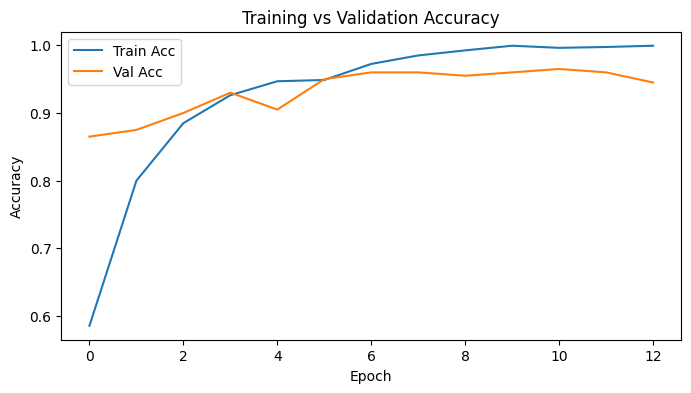

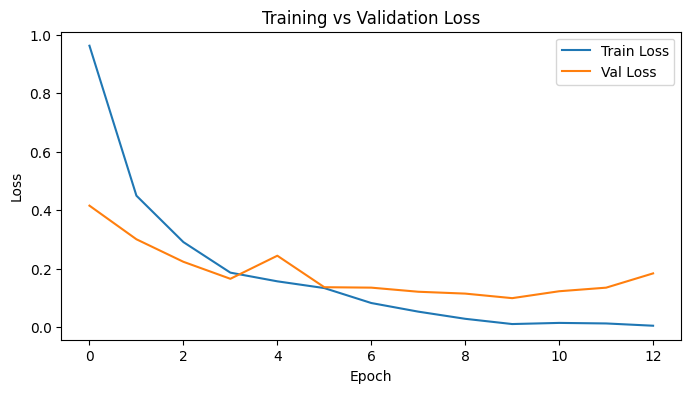

In [20]:
# ========================================
# 7️⃣ Plot hasil training
# ========================================

# Plot Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()



In [36]:
# ========================================
# 8️⃣ Prediksi contoh gambar
# ========================================
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = "dataset/test/Pepper__healthy/Pepper_healthy (919).JPG" 
# img_path = "dataset/test/Pepper__bacterial_spot/Pepper_bacterial_spot (919).JPG" # ganti salah satu gambar test
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0][0]

if pred > 0.01:
    print("🍃 Prediction: Pepper — Healthy")
else:
    print("🌿 Prediction: Pepper — Bacterial Spot")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
🍃 Prediction: Pepper — Healthy
